In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head(40)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


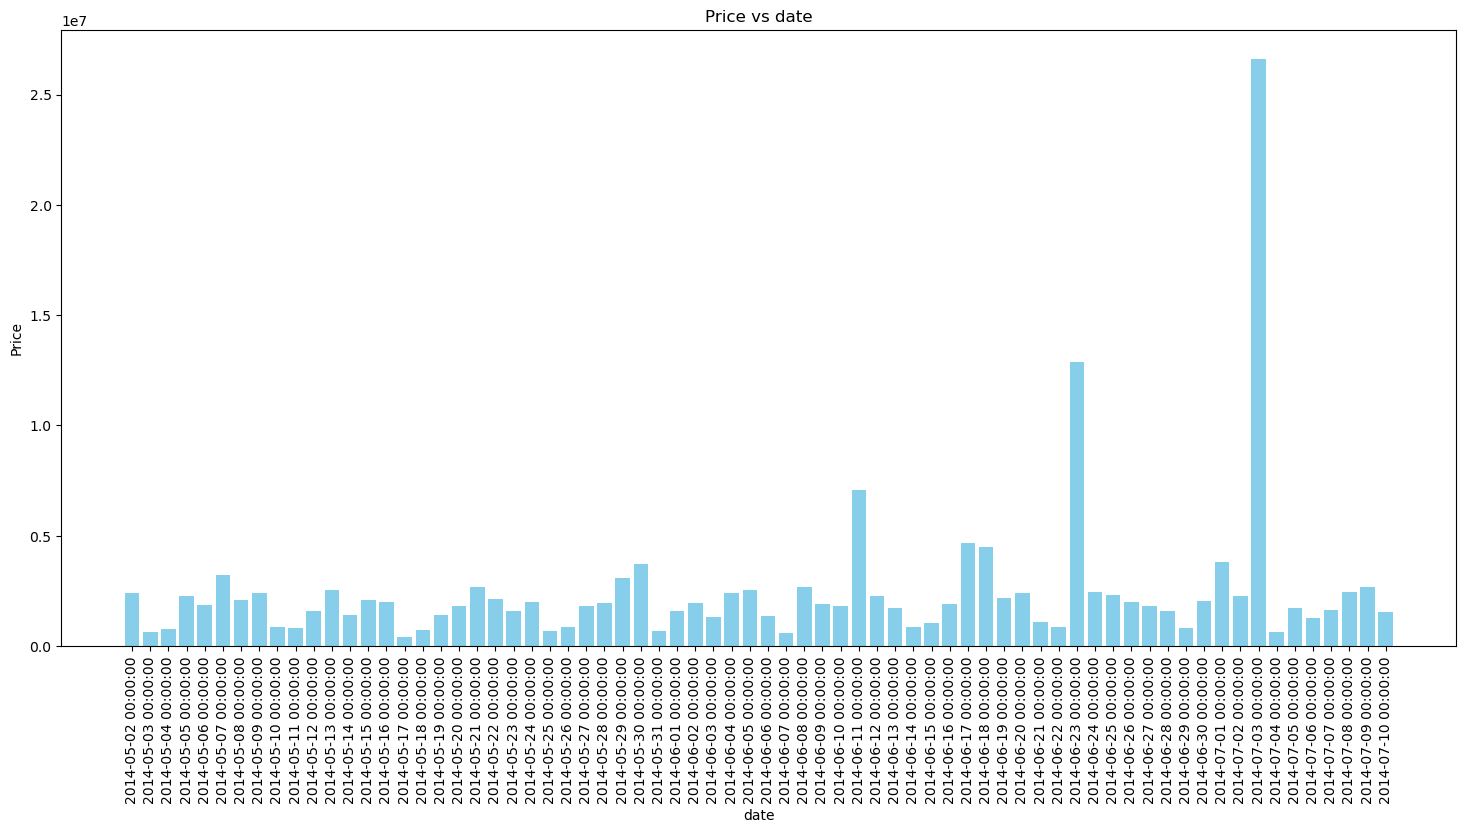

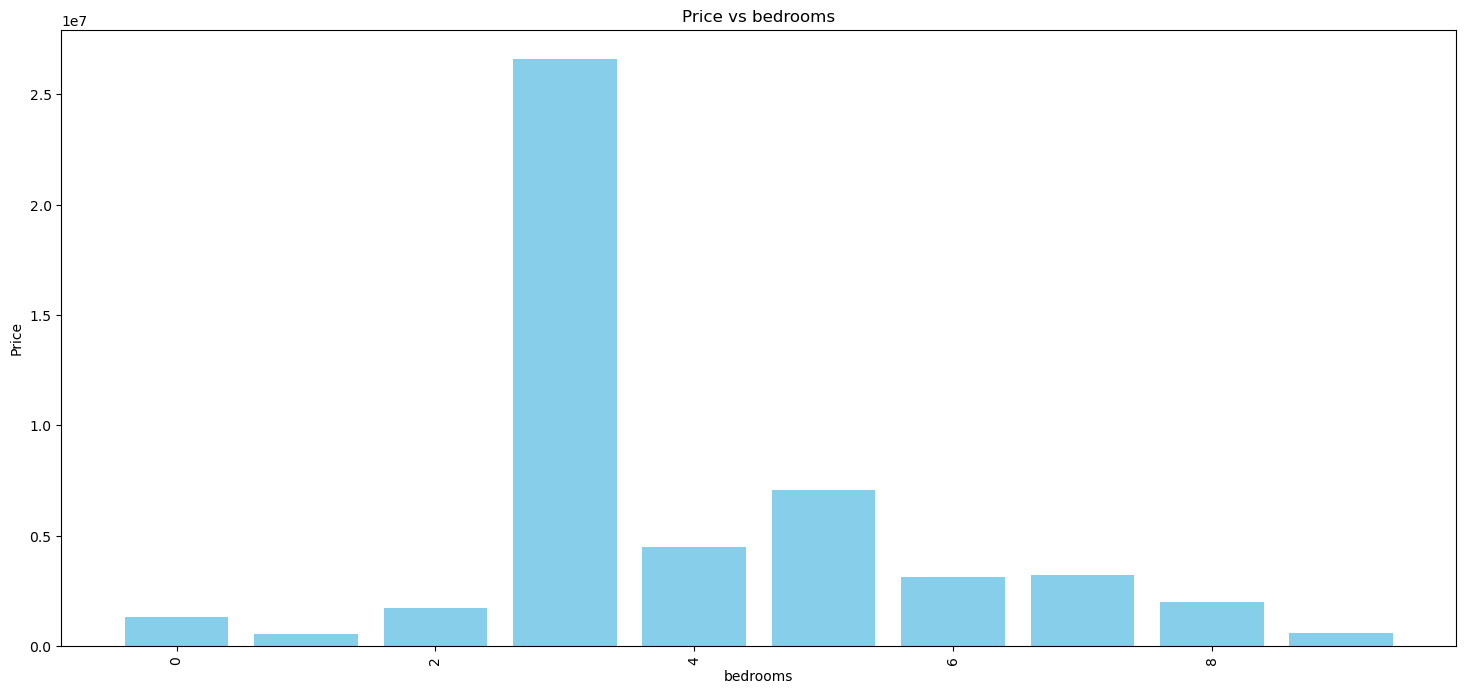

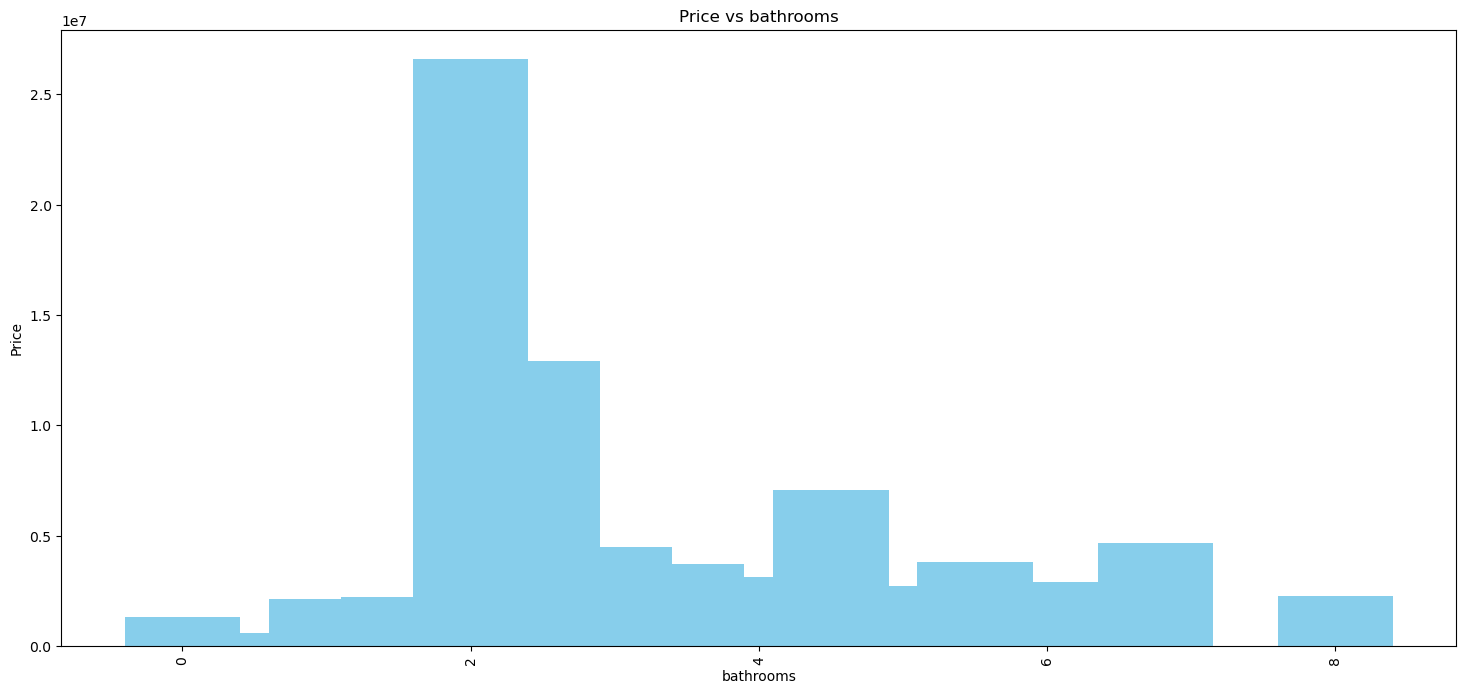

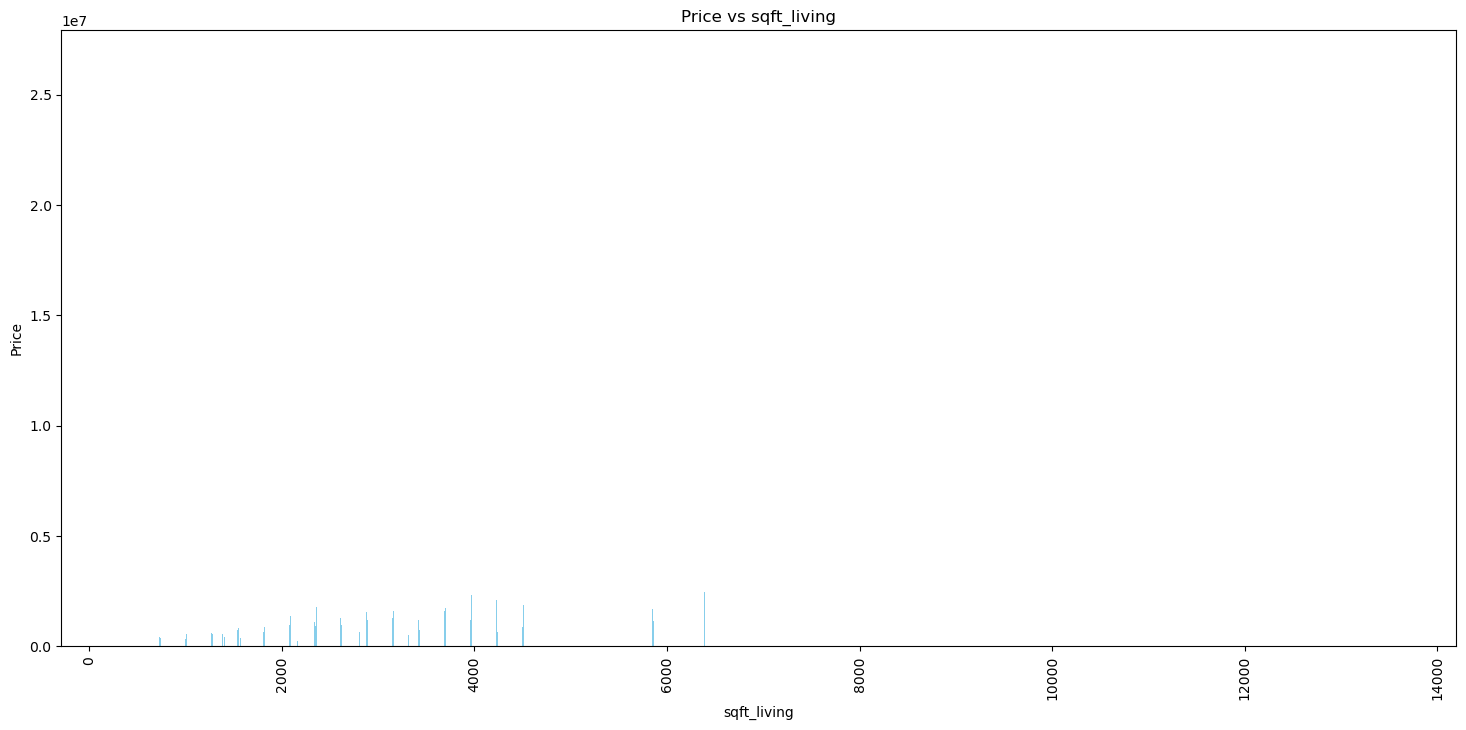

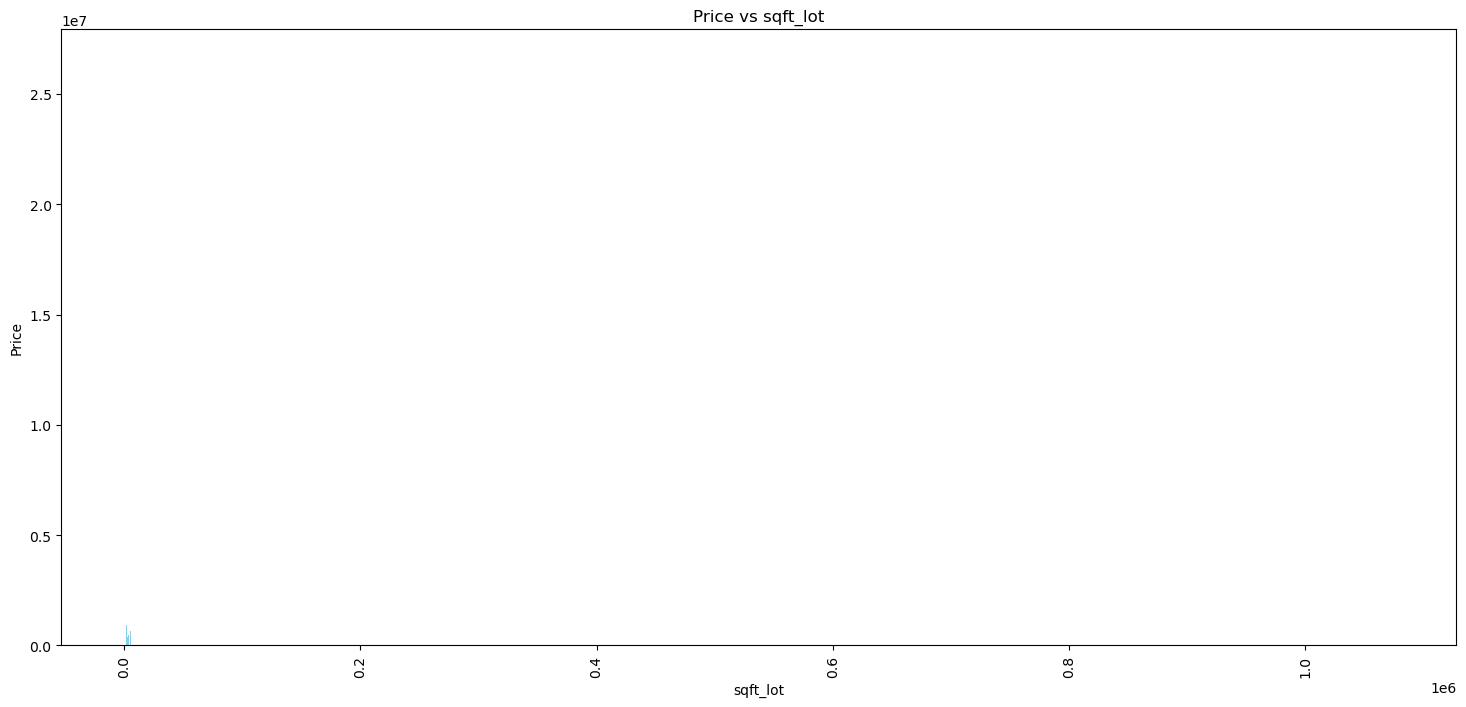

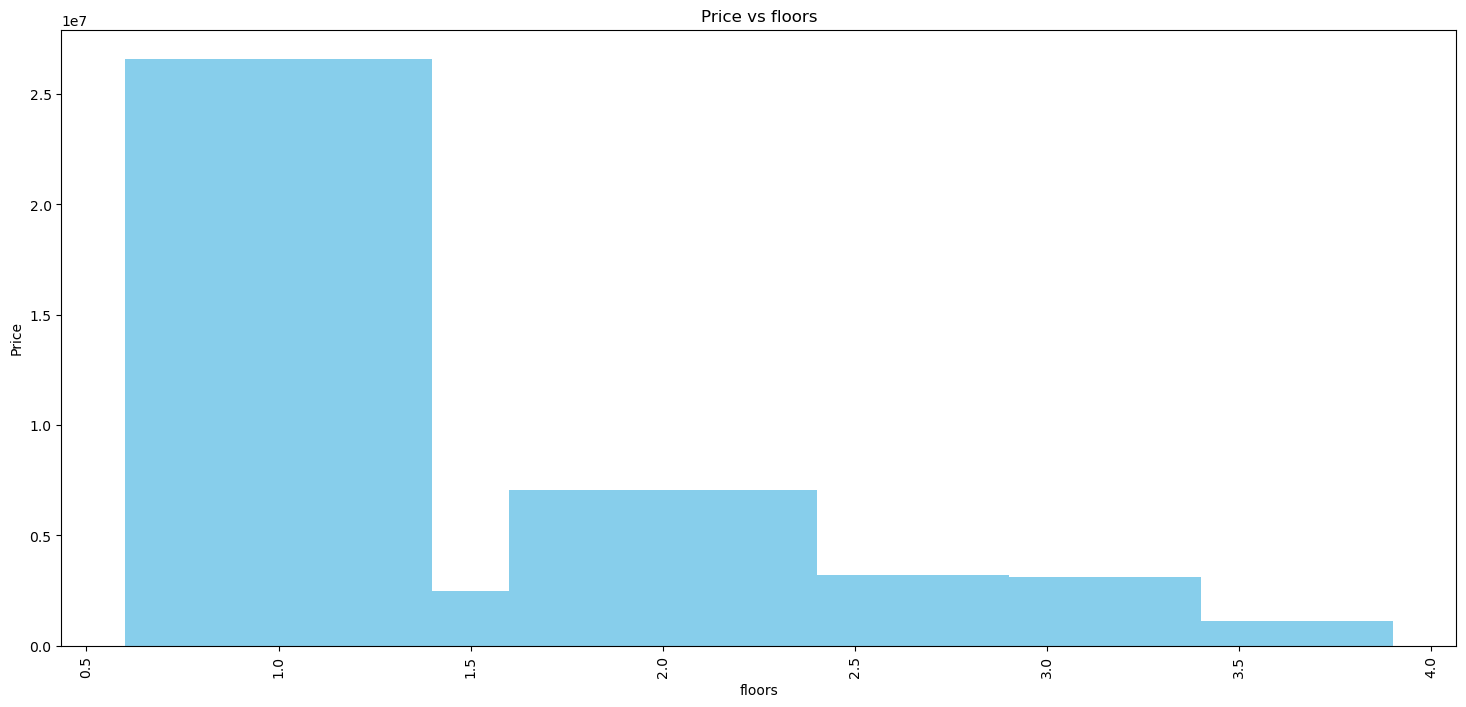

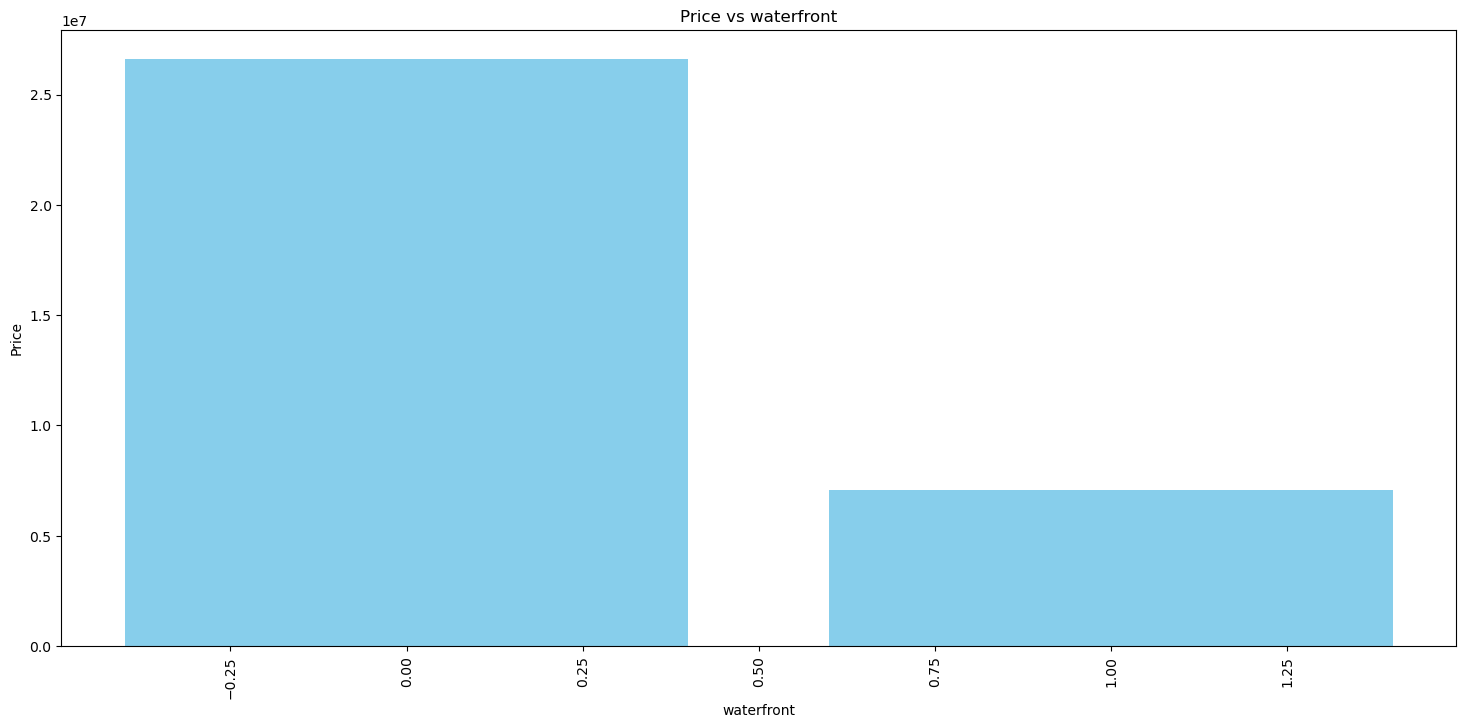

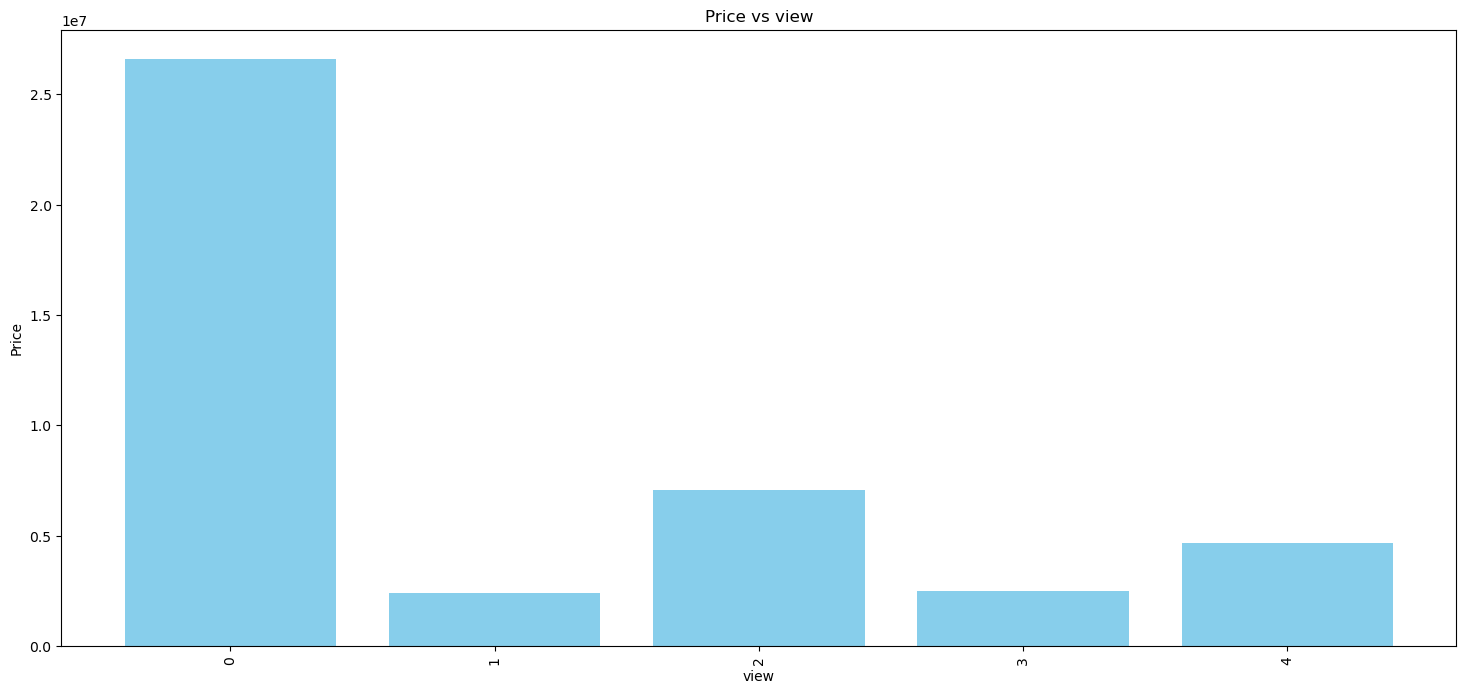

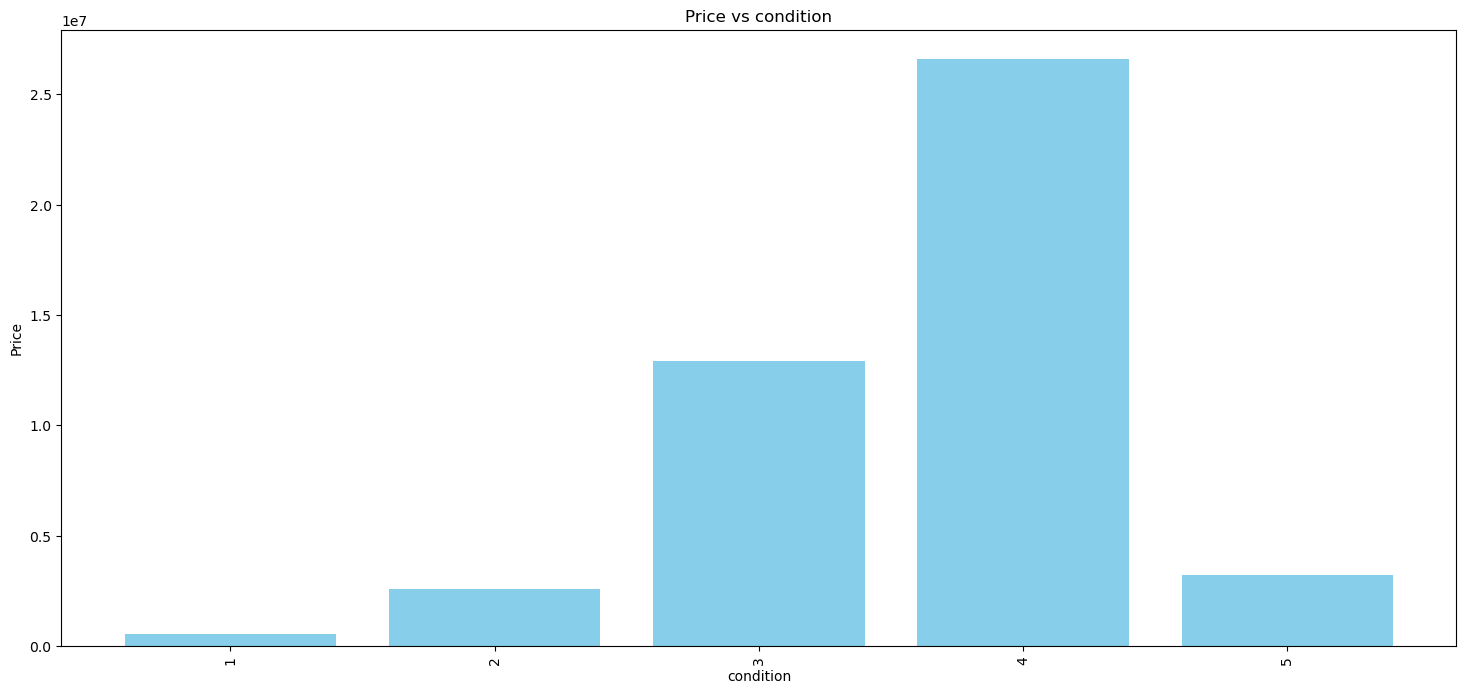

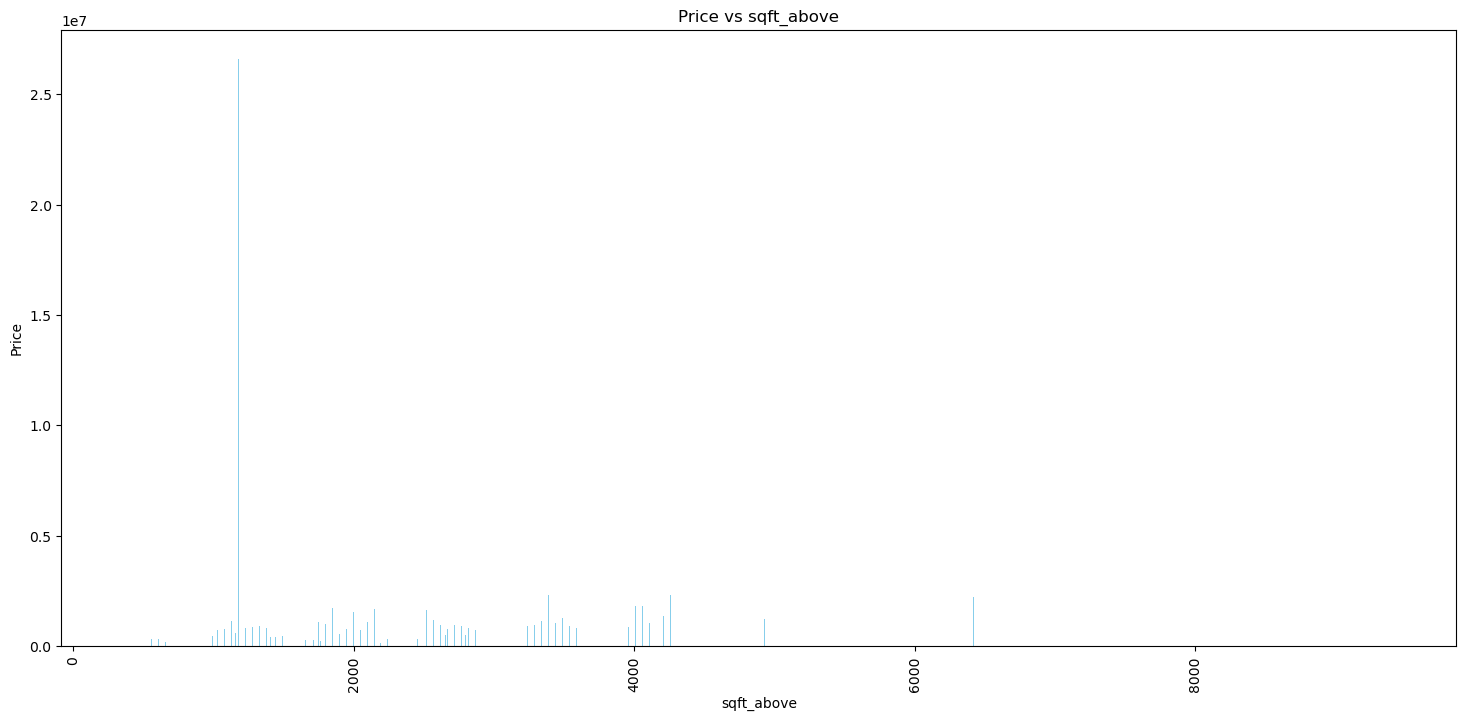

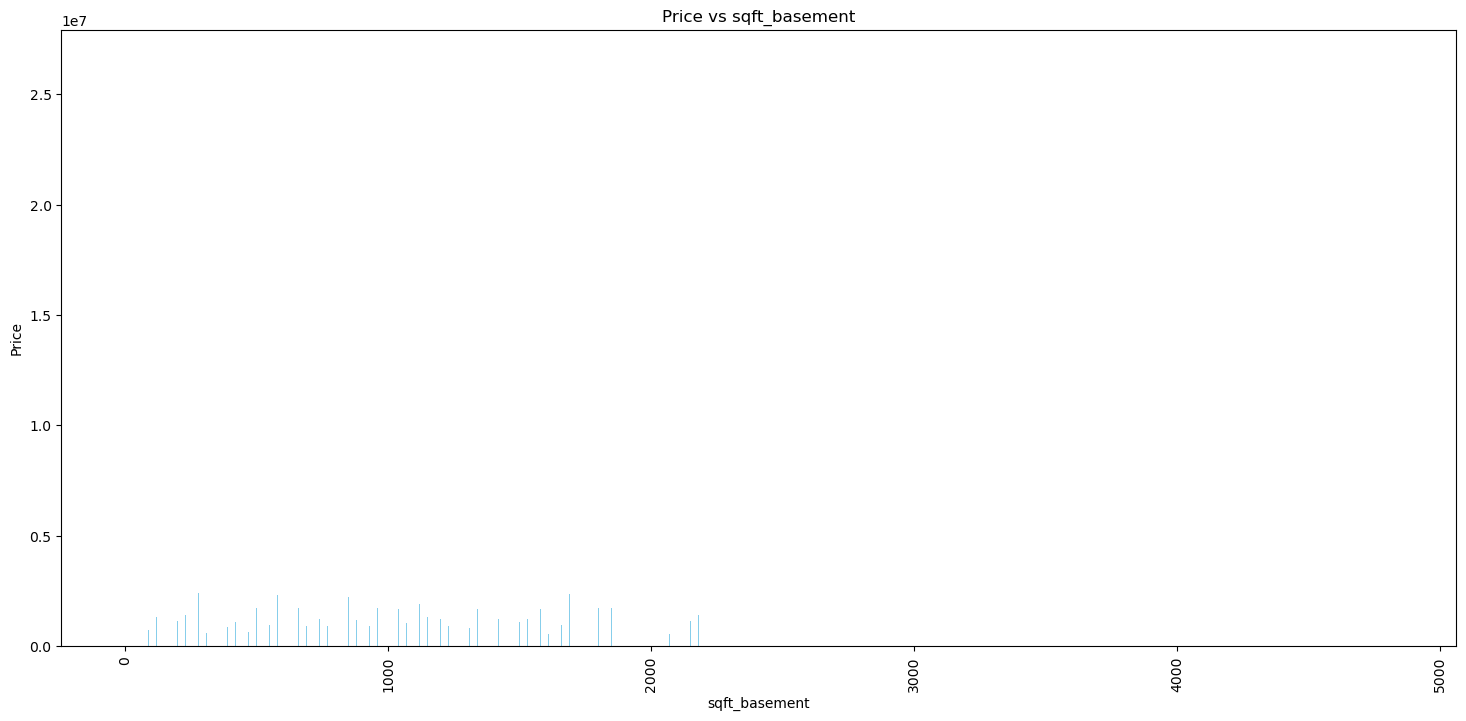

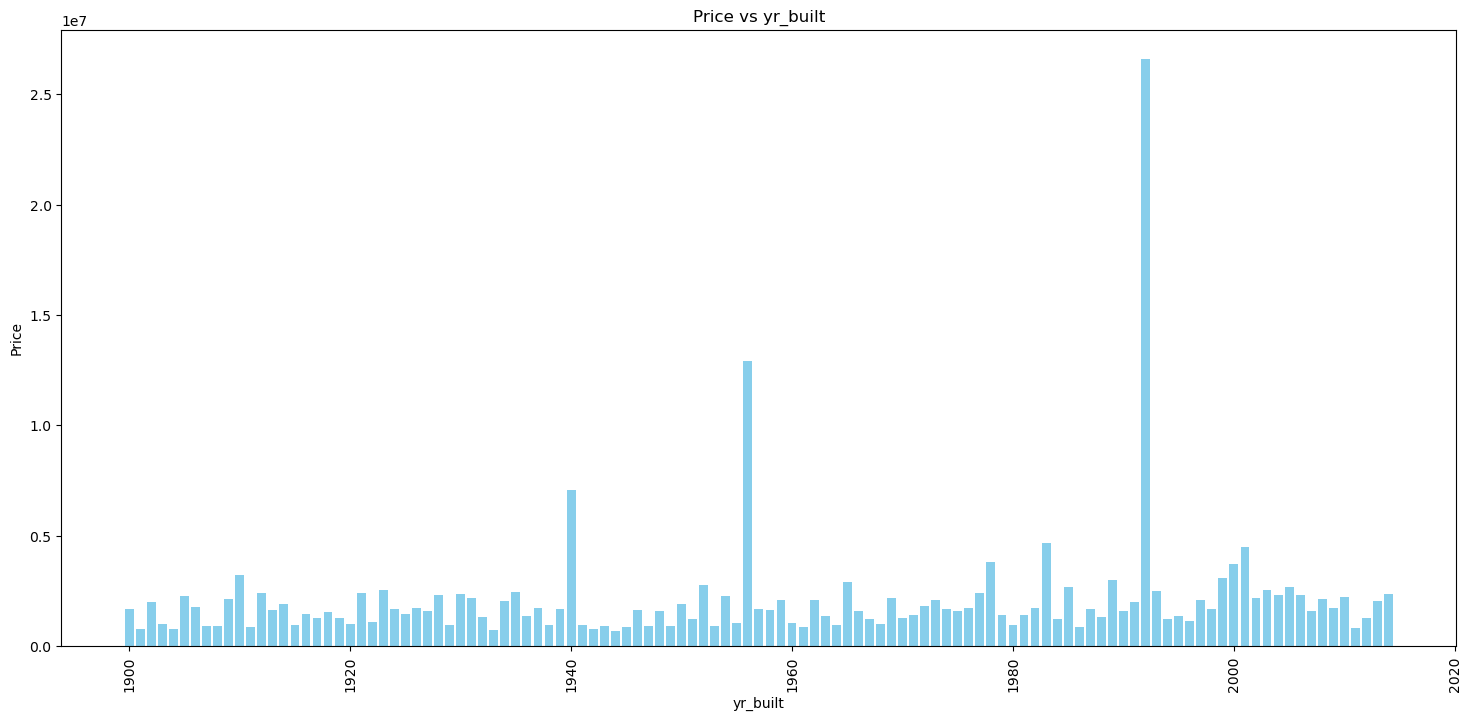

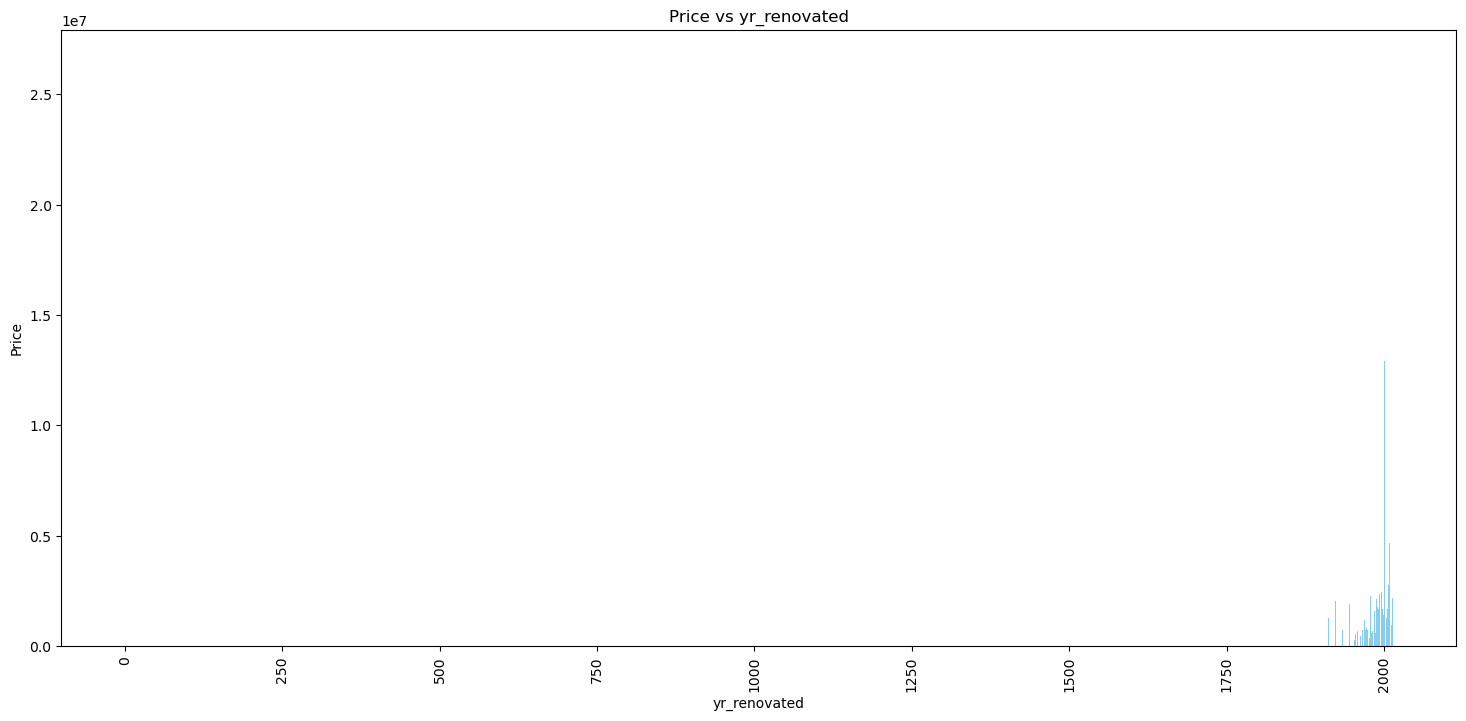

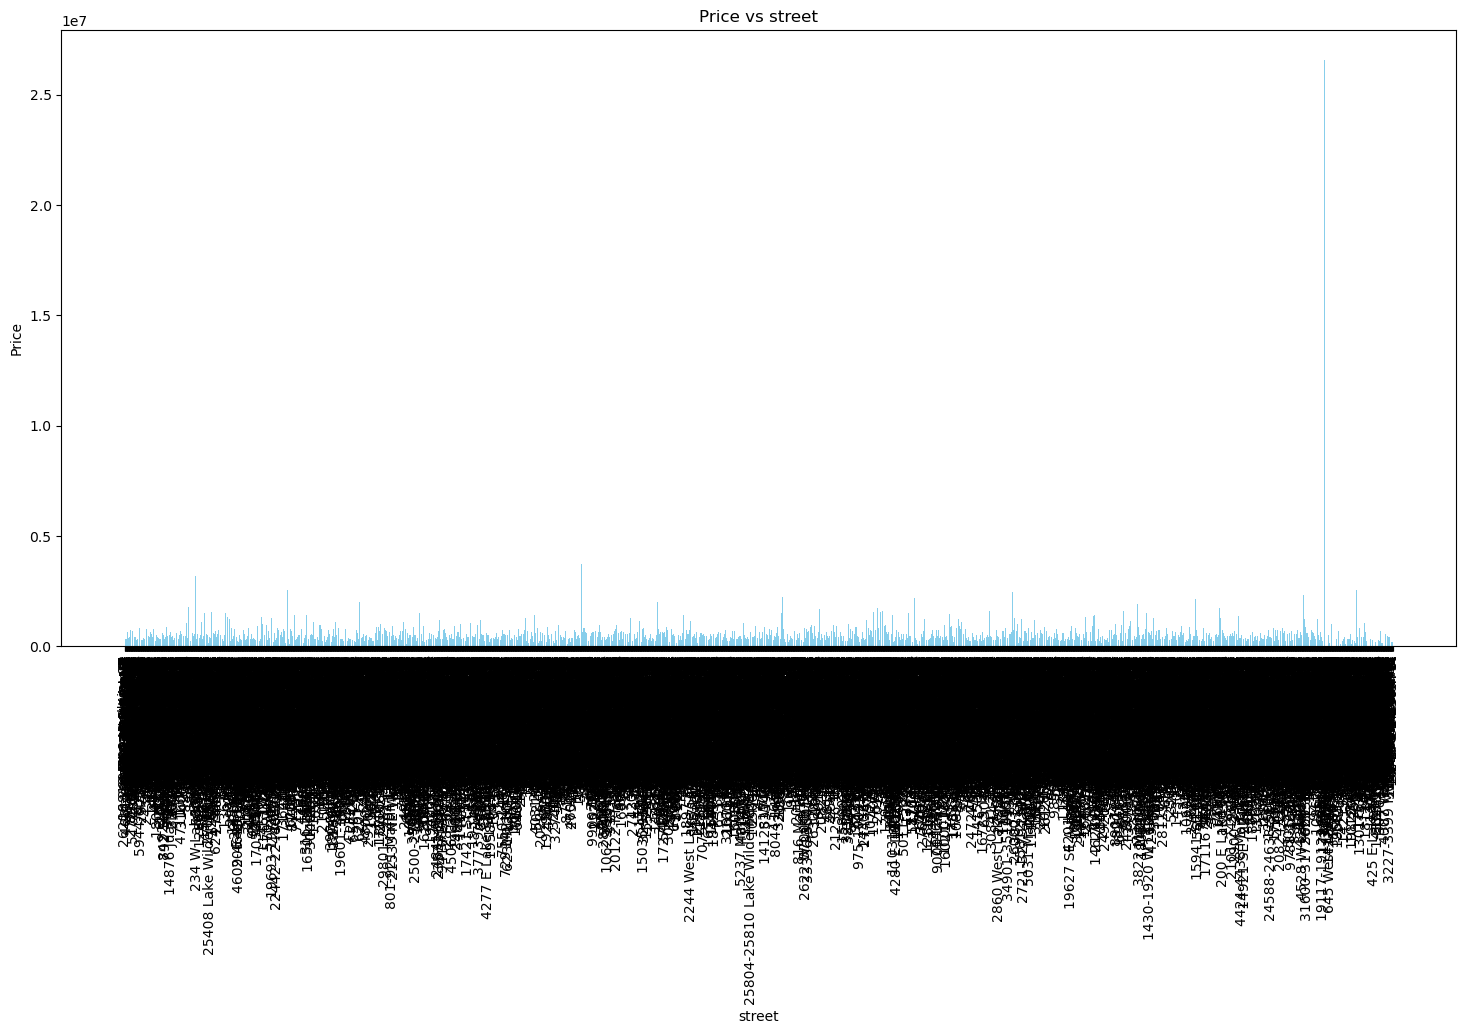

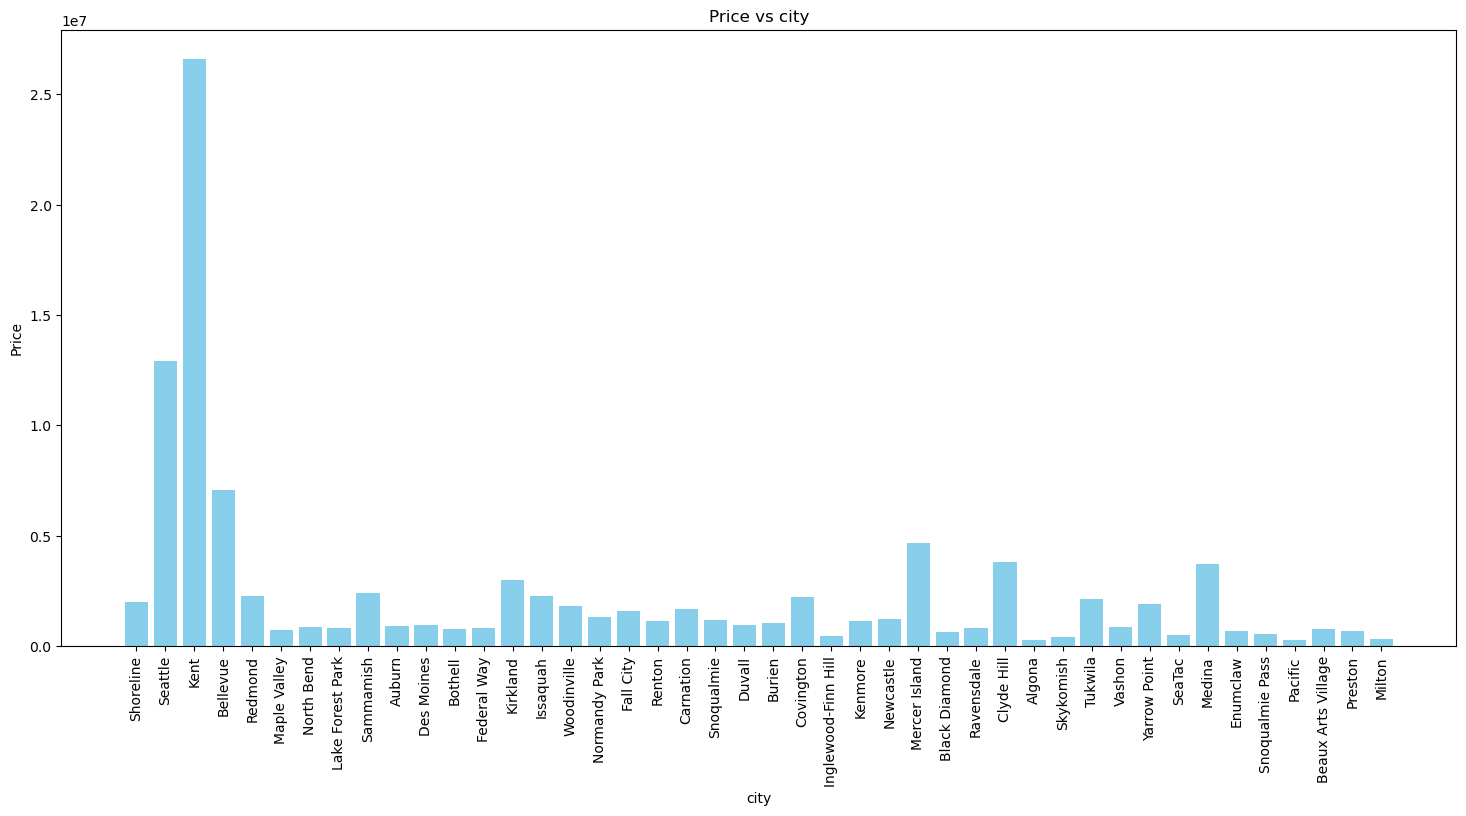

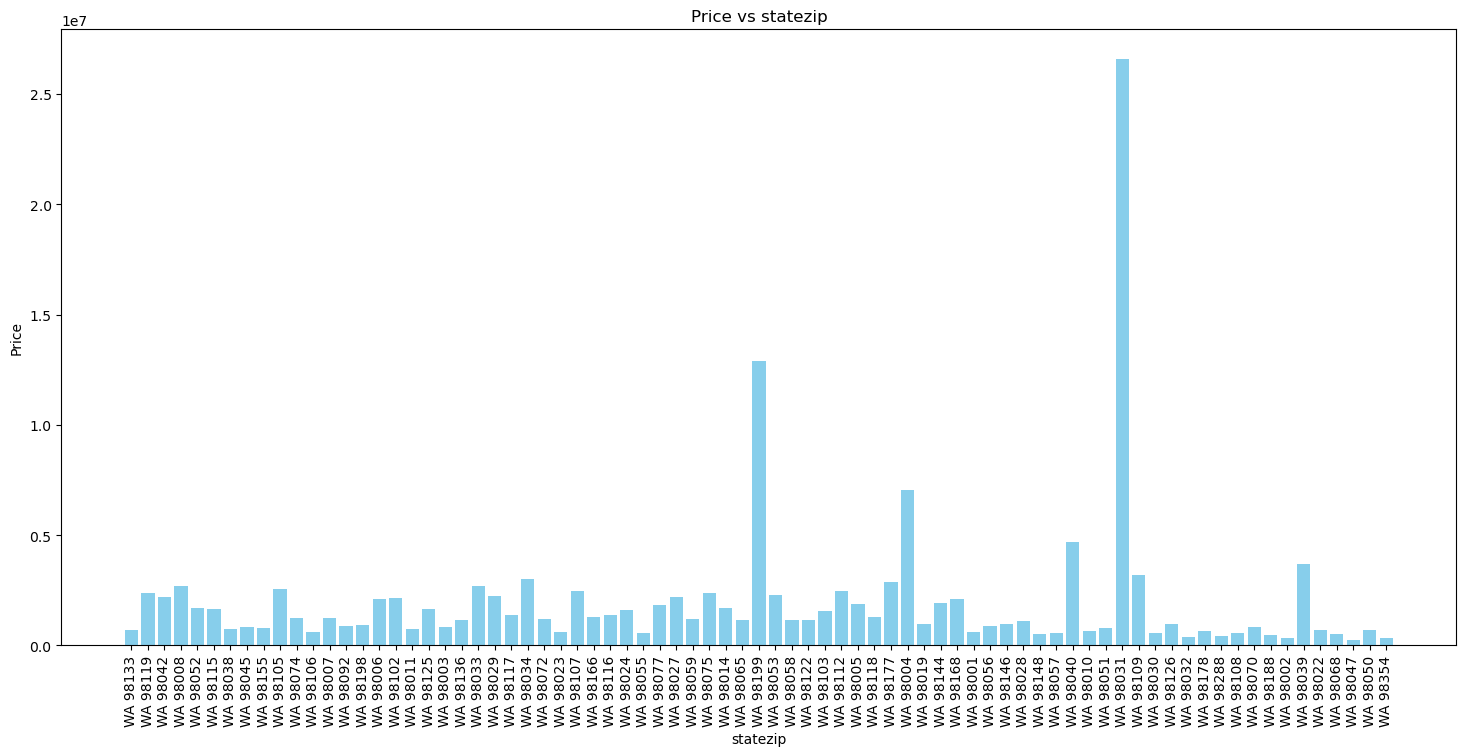

In [4]:
feature_names = df.drop(columns=['price', 'country']).columns.to_numpy()

for col in feature_names :
    plt.figure(figsize=(18, 8))
    plt.bar(df[col], df['price'], color='skyblue')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Price')
    plt.title(f'Price vs {col}')
    plt.show()

In [5]:
encoder = OrdinalEncoder()
df['city'] = encoder.fit_transform(df[['city']]).astype(int)
df['street'] = encoder.fit_transform(df[['street']]).astype(int)


In [6]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**9//60//60

In [7]:
df=df.drop(columns=['country'])
df["statezip"] = df["statezip"].str.extract(r'(\d+)$')
df["statezip"]=pd.to_numeric(df["statezip"])
df.head(40)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,388608,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,98133
1,388608,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,98119
2,388608,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,98042
3,388608,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,98008
4,388608,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,98052
5,388608,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,3521,35,98115
6,388608,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2286,31,98052
7,388608,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,2038,21,98038
8,388608,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,3369,27,98045
9,388608,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,3846,35,98115


In [8]:
X = df.drop(columns=['price'])
y = df[['price']]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler() 
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [11]:
X_train=np.vstack((np.ones((X_train.shape[0],)),X_train.T)).T
X_test=np.vstack((np.ones((X_test.shape[0],)),X_test.T)).T

In [12]:
print(f'train data :\n {X_train}')
print(f'\ntest data :\n {X_test}')

train data :
 [[ 1.          0.65284191  2.86068599 ...  0.81340943  0.76503674
   0.46587578]
 [ 1.         -1.11865849 -0.44286771 ...  1.15082255  1.01656316
  -0.28815585]
 [ 1.         -0.20760114 -0.44286771 ... -1.30420138  0.76503674
   0.99369792]
 ...
 [ 1.          0.19731324 -0.44286771 ... -1.71566217  0.76503674
   1.82313271]
 [ 1.          0.8046848   0.65831686 ... -0.05913172 -0.66027963
  -0.91023195]
 [ 1.         -0.81497271 -0.44286771 ... -0.53624303  0.59735246
  -0.11849873]]

test data :
 [[ 1.         -0.10637255 -0.44286771 ...  0.1454536   0.76503674
   2.23785011]
 [ 1.         -0.9162013   0.65831686 ...  1.23479414  0.76503674
   0.69208527]
 [ 1.         -0.86558701  0.65831686 ...  0.66378733 -0.57643749
  -0.89138115]
 ...
 [ 1.         -0.9162013  -0.44286771 ...  1.66762951  0.76503674
   0.65438369]
 [ 1.          0.60222761 -0.44286771 ...  0.53324967 -1.16333247
  -1.09873985]
 [ 1.          0.39977043  1.75950143 ... -0.81029576 -1.91791172
  -1

In [13]:
print(f'train data :\n {y_train}')
print(f'\ntest data :\n {y_test}')

train data :
 [[ 0.29185238]
 [-0.049557  ]
 [ 0.23250616]
 ...
 [ 0.24970307]
 [-0.47534928]
 [ 0.17804925]]

test data :
 [[ 3.38645160e+00]
 [ 3.89565454e-02]
 [ 2.34529324e-01]
 [-1.46500400e-01]
 [-3.90966374e-01]
 [ 1.19883213e-01]
 [ 8.81942662e-01]
 [ 1.22756697e+00]
 [-5.25844153e-01]
 [-4.41545541e-01]
 [ 1.92724545e+00]
 [-5.04348007e-01]
 [-3.57263789e-01]
 [ 1.14825296e-01]
 [ 1.02950174e-02]
 [ 4.57004343e-02]
 [-4.66919423e-01]
 [-3.06684622e-01]
 [ 1.84793144e-01]
 [-3.40387207e-01]
 [-2.28630852e-01]
 [-2.39228873e-01]
 [-1.16226216e-02]
 [-9.93664939e-03]
 [ 2.20968231e-02]
 [-2.39228873e-01]
 [-3.42781288e-01]
 [-4.53420663e-02]
 [-5.29216097e-01]
 [ 5.09342799e-01]
 [ 8.65082940e-01]
 [-2.30799012e-01]
 [ 9.45203130e-03]
 [-3.23527485e-01]
 [-1.88649706e-01]
 [ 7.94198790e-02]
 [-5.59647896e-01]
 [-5.29300396e-01]
 [ 7.00700647e-01]
 [ 1.90195586e+00]
 [-9.30477489e-01]
 [-4.08466766e-01]
 [-7.90036002e-01]
 [-6.64167192e-02]
 [ 5.44748215e-01]
 [ 4.35160020e-01]
 [

In [14]:
print(f'X_train data shape : {X_train.shape}')
print(f'y_train data shape : {y_train.shape}')
print(f'X_test data shape : {X_test.shape}')
print(f'X_test data shape : {y_test.shape}')

X_train data shape : (3680, 17)
y_train data shape : (3680, 1)
X_test data shape : (920, 17)
X_test data shape : (920, 1)


In [15]:
def model(x,y,L,it):
    m=y.size
    theta=np.zeros((x.shape[1],1))
    cost_list=[]
    mse_list=[]
    r2_list = []
    
    for i in range(it):
        y_pred=np.dot(x,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-y),axis=0).item() #cost function
        d_theta=(1/m)*np.dot(x.T,y_pred-y) #gradient
        theta=theta-L*d_theta
        mse = np.mean(np.square(y_pred - y))  # Mean Squared Error


        cost_list.append(cost)
        mse_list.append(mse)

        
        if(i%(it/10)==0):
            print(f'cost: {cost}')
            print(f'MSE: {mse}')
    return theta,cost_list,mse_list

In [16]:
it=1000000
L=0.0001
theta,cost_list,mse_list=model(X_train,y_train,L,it)

cost: 0.5
MSE: 1.0
cost: 0.4100613745456568
MSE: 0.8201227490913136
cost: 0.41005810411507243
MSE: 0.8201162082301447
cost: 0.41005809120015235
MSE: 0.8201161824003047
cost: 0.4100580910680213
MSE: 0.8201161821360426
cost: 0.4100580910665599
MSE: 0.8201161821331198
cost: 0.41005809106654345
MSE: 0.8201161821330869
cost: 0.41005809106654345
MSE: 0.8201161821330869
cost: 0.41005809106654345
MSE: 0.8201161821330869
cost: 0.4100580910665434
MSE: 0.8201161821330868


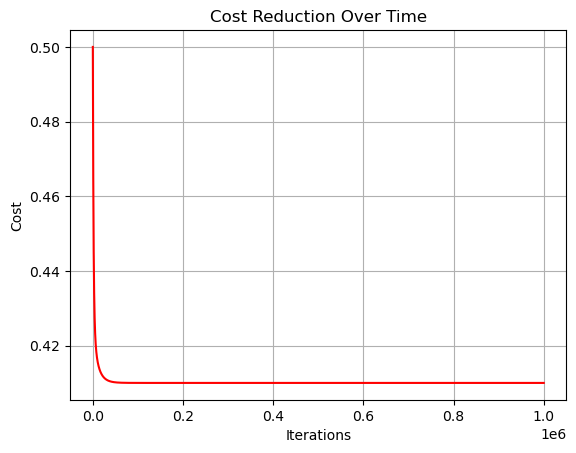

In [17]:
plt.plot(cost_list, linestyle='-', color='r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Time')
plt.grid(True)
plt.show()

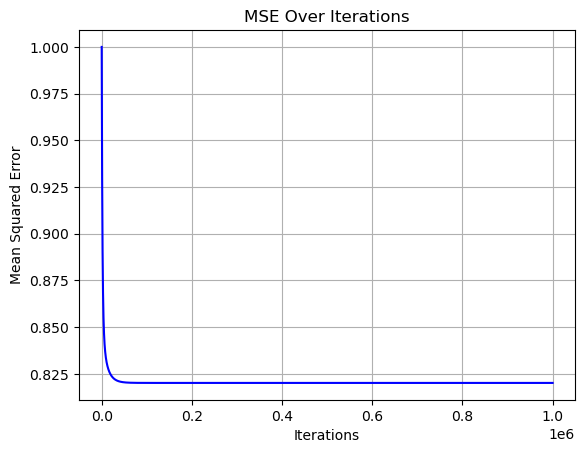

In [18]:
plt.plot(mse_list, linestyle='-', color='b')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Iterations')
plt.grid(True)
plt.show()

In [19]:
y_predT=np.dot(X_test,theta)

In [20]:
mse = np.mean((y_predT - y_test)**2)
print(f'Mean Squared Error : {mse}')

Mean Squared Error : 0.2510323500368695


In [21]:
cost=(1/(2*y_test.size))*np.sum(np.square(y_predT-y_test),axis=0)
print(f'Cost : {cost}')

Cost : [0.12551618]


In [22]:
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_predT) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f'Coefficient of determination is : {r2}')

Coefficient of determination is : 0.5147361523788403


In [23]:
error=(1/X_test.shape[0])*np.sum(np.abs(y_predT-y_test),axis=0)
print(f'Error is : {error*100}%')
print(f'Accuracy is : {(1-error)*100}%')

Error is : [28.13949143]%
Accuracy is : [71.86050857]%


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse2)

r22 = r2_score(y_test, y_pred)
print("R-squared (R²):", r22)

Mean Squared Error: 0.25103235003728014
R-squared (R²): 0.5147361523780465


In [25]:
X = df.drop(columns=['price'])
y = df[['price']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mse23 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse23)

r223 = r2_score(y_test, y_pred)
print("R-squared (R²):", r223)

Mean Squared Error: 64524254973.88687
R-squared (R²): 0.45868456314771044


In [26]:
print(f'Difference of Coefficient of Determination between Linear Regression model from sklearn and from scratch :(r22-r2) \n {r22-r2}')

Difference of Coefficient of Determination between Linear Regression model from sklearn and from scratch :(r22-r2) 
 -7.938094626069869e-13


In [27]:
print(f'Difference of Coefficient of Determination between Linear Regression model from sklearn without scaling the data and from scratch :(r223-r2) \n {r223-r2}')

Difference of Coefficient of Determination between Linear Regression model from sklearn without scaling the data and from scratch :(r223-r2) 
 -0.05605158923112985
